#Basketball-reference Faeture Selection

In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sklearn as skl
%matplotlib inline

from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier


###Read Player Seaaon CSV

In [2]:
df_Season_norm = pd.read_csv('e:\\nba\\Season_Normalization.csv', header=0)

df_Season_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3439
Data columns (total 20 columns):
Age          3440 non-null float64
G            3440 non-null float64
MP           3440 non-null float64
EFF          3440 non-null float64
GmSc         3440 non-null float64
PER          3440 non-null float64
ORtg         3440 non-null float64
DRtg         3440 non-null float64
AST_Per      3440 non-null float64
STL_Per      3440 non-null float64
BLK_Per      3440 non-null float64
TOV_Per      3440 non-null float64
TS_Per       3440 non-null float64
FT_Per       3440 non-null float64
Three_Per    3440 non-null float64
ORB_Per      3440 non-null float64
DRB_Per      3440 non-null float64
TRB_Per      3440 non-null float64
USG_Per      3440 non-null float64
Salary       3440 non-null float64
dtypes: float64(20)
memory usage: 564.4 KB


###Feature Selection RFECV

In [3]:
vars_list = ['Age','G','MP','EFF','GmSc','PER','ORtg','DRtg','AST_Per','STL_Per','BLK_Per',
             'TOV_Per','TS_Per','FT_Per','Three_Per','ORB_Per','DRB_Per','TRB_Per','USG_Per']

data   = df_Season_norm[vars_list]
target = df_Season_norm['Salary']

In [5]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
RFECV_selector = RFECV(estimator, step=1, cv=5)
RFECV_selector = selector.fit(data,target)

RFECV_selector.support_ 

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [6]:
RFECV_selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
print("Optimal number of features : %d" % RFECV_selector.n_features_)

Optimal number of features : 18


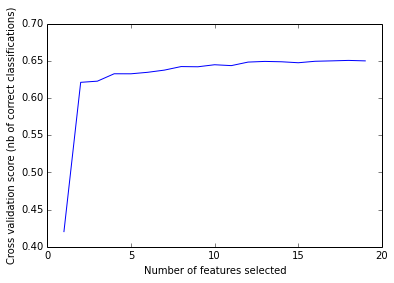

In [8]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(RFECV_selector.grid_scores_) + 1), RFECV_selector.grid_scores_)
plt.show()

###Multi-class classification

In [9]:
clf = skl.svm.SVC()
clf.fit(data,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
clf.support_

array([3140, 2264,  485, ..., 2422,  265, 2832])

###Recursive feature elimination

In [11]:
from sklearn.feature_selection import RFE
from sklearn.datasets import load_digits
digits = load_digits()

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=15, step=1)
rfe.fit(data,target)


RFE(estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
  estimator_params={}, n_features_to_select=15, step=1, verbose=0)

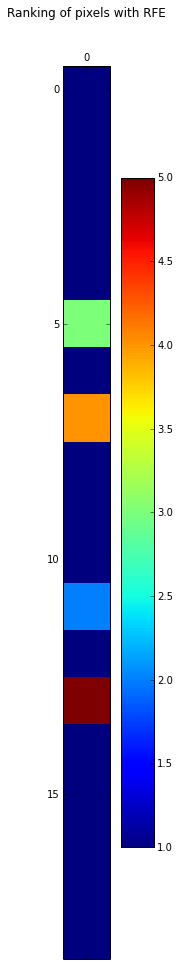

In [12]:
ranking = rfe.ranking_.reshape(len(vars_list),1)

plt.matshow(ranking)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [13]:
print rfe.support_ 

print rfe.ranking_


[ True  True  True  True  True False  True False  True  True  True False
  True False  True  True  True  True  True]
[1 1 1 1 1 3 1 4 1 1 1 2 1 5 1 1 1 1 1]


In [14]:
df1 = pd.DataFrame(columns=vars_list)

df1.loc[len(df1)+1] = selector.support_
df1.loc[len(df1)+1] = selector.ranking_
df1.loc[len(df1)+1] = rfe.support_
df1.loc[len(df1)+1] = rfe.ranking_

df1

,Age,G,MP,EFF,GmSc,PER,ORtg,DRtg,AST_Per,STL_Per,BLK_Per,TOV_Per,TS_Per,FT_Per,Three_Per,ORB_Per,DRB_Per,TRB_Per,USG_Per
1,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1
3,True,True,True,True,True,False,True,False,True,True,True,False,True,False,True,True,True,True,True
4,1,1,1,1,1,3,1,4,1,1,1,2,1,5,1,1,1,1,1


###LinearRegression###

In [15]:
from sklearn.linear_model import LinearRegression

# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

# create the RFE model and select 3 attributes
rfe_LinearRegression = RFE(model, 15)
rfe_LinearRegression = rfe_LinearRegression.fit(data,target)
# summarize the selection of the attributes
print(rfe_LinearRegression.support_)
print(rfe_LinearRegression.ranking_)

[ True False  True  True  True  True False  True  True  True False  True
  True  True False  True  True  True  True]
[1 4 1 1 1 1 5 1 1 1 2 1 1 1 3 1 1 1 1]


In [16]:
df1.loc[len(df1)+1] = rfe_LinearRegression.support_
df1.loc[len(df1)+1] = rfe_LinearRegression.ranking_
df1

,Age,G,MP,EFF,GmSc,PER,ORtg,DRtg,AST_Per,STL_Per,BLK_Per,TOV_Per,TS_Per,FT_Per,Three_Per,ORB_Per,DRB_Per,TRB_Per,USG_Per
1,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1
3,True,True,True,True,True,False,True,False,True,True,True,False,True,False,True,True,True,True,True
4,1,1,1,1,1,3,1,4,1,1,1,2,1,5,1,1,1,1,1
5,True,False,True,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,True
6,1,4,1,1,1,1,5,1,1,1,2,1,1,1,3,1,1,1,1


###LogisticRegression###

In [17]:
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

# create the RFE model and select 3 attributes
rfe_LogisticRegression = RFE(model, 15)
rfe_LogisticRegression = rfe_LogisticRegression.fit(data,target)
# summarize the selection of the attributes
print(rfe_LogisticRegression.support_)
print(rfe_LogisticRegression.ranking_)

[ True  True  True  True  True  True  True  True  True False False  True
  True False  True False  True  True  True]
[1 1 1 1 1 1 1 1 1 2 3 1 1 5 1 4 1 1 1]


In [18]:
df1.loc[len(df1)+1] = rfe_LogisticRegression.support_
df1.loc[len(df1)+1] = rfe_LogisticRegression.ranking_
df1

,Age,G,MP,EFF,GmSc,PER,ORtg,DRtg,AST_Per,STL_Per,BLK_Per,TOV_Per,TS_Per,FT_Per,Three_Per,ORB_Per,DRB_Per,TRB_Per,USG_Per
1,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1
3,True,True,True,True,True,False,True,False,True,True,True,False,True,False,True,True,True,True,True
4,1,1,1,1,1,3,1,4,1,1,1,2,1,5,1,1,1,1,1
5,True,False,True,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,True
6,1,4,1,1,1,1,5,1,1,1,2,1,1,1,3,1,1,1,1
7,True,True,True,True,True,True,True,True,True,False,False,True,True,False,True,False,True,True,True
8,1,1,1,1,1,1,1,1,1,2,3,1,1,5,1,4,1,1,1


###Randomized Decision trees###

In [19]:
# Feature Importance
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(data, target)
# display the relative importance of each attribute 
# The feature importances (the higher, the more important the feature).
print(model.feature_importances_)

[ 0.05548873  0.05351573  0.0558906   0.04916897  0.05373913  0.05154227
  0.05143743  0.05372042  0.05434591  0.05024735  0.05229831  0.05139269
  0.04984475  0.05368222  0.05369446  0.05352361  0.05210727  0.05296396
  0.05139618]


In [34]:
df1.loc[len(df1)+1] = model.feature_importances_
df1

,Age,G,MP,EFF,GmSc,PER,ORtg,DRtg,AST_Per,STL_Per,BLK_Per,TOV_Per,TS_Per,FT_Per,Three_Per,ORB_Per,DRB_Per,TRB_Per,USG_Per
1,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1
3,True,True,True,True,True,False,True,False,True,True,True,False,True,False,True,True,True,True,True
4,1,1,1,1,1,3,1,4,1,1,1,2,1,5,1,1,1,1,1
5,True,False,True,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,True
6,1,4,1,1,1,1,5,1,1,1,2,1,1,1,3,1,1,1,1
7,True,True,True,True,True,True,True,True,True,False,False,True,True,False,True,False,True,True,True
8,1,1,1,1,1,1,1,1,1,2,3,1,1,5,1,4,1,1,1
9,0.05548873,0.05351573,0.0558906,0.04916897,0.05373913,0.05154227,0.05143743,0.05372042,0.05434591,0.05024735,0.05229831,0.05139269,0.04984475,0.05368222,0.05369446,0.05352361,0.05210727,0.05296396,0.05139618


###Univariate feature selection###

C:\Anaconda\lib\site-packages\numpy\lib\utils.py:134: DeprecationWarning: `fprob` is deprecated!
fprob is deprecated in scipy 0.14, use stats.f.sf or special.fdtrc instead

  warnings.warn(depdoc, DeprecationWarning)


<Container object of 19 artists>

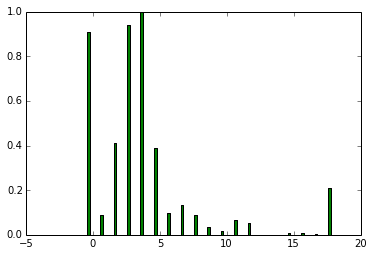

In [25]:
from sklearn.feature_selection import SelectPercentile, f_classif

Uni_selector = SelectPercentile(f_classif, percentile=10)
Uni_selector.fit(data, target)
scores = -np.log10(Uni_selector.pvalues_)
scores /= scores.max()
data_indices = np.arange(data.shape[-1])
plt.bar(data_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

In [27]:
Uni_selector.scores_

array([ 3.46276281,  1.41492353,  2.23494131,  3.54570506,  3.71320212,
        2.17358811,  1.43811212,  1.54919122,  1.41404226,  1.23016957,
        1.11867413,  1.33619843,  1.2877369 ,  0.37774699,  0.95543641,
        1.06528891,  1.07428571,  1.04421988,  1.74385861])

In [26]:
Uni_selector.pvalues_

array([  7.59617410e-113,   9.29386744e-012,   8.74785837e-052,
         1.14784319e-116,   2.97660400e-124,   1.36738043e-048,
         1.07465728e-012,   1.81763612e-017,   1.00772874e-011,
         2.66715577e-005,   1.40209293e-002,   9.13486782e-009,
         4.31620818e-007,   1.00000000e+000,   8.17934603e-001,
         1.07505869e-001,   8.00363014e-002,   1.98341896e-001,
         1.20059459e-026])

In [35]:
df1.loc[len(df1)+1] = Uni_selector.scores_
df1.loc[len(df1)+1] = Uni_selector.pvalues_
df1

,Age,G,MP,EFF,GmSc,PER,ORtg,DRtg,AST_Per,STL_Per,BLK_Per,TOV_Per,TS_Per,FT_Per,Three_Per,ORB_Per,DRB_Per,TRB_Per,USG_Per
1,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1
3,True,True,True,True,True,False,True,False,True,True,True,False,True,False,True,True,True,True,True
4,1,1,1,1,1,3,1,4,1,1,1,2,1,5,1,1,1,1,1
5,True,False,True,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,True
6,1,4,1,1,1,1,5,1,1,1,2,1,1,1,3,1,1,1,1
7,True,True,True,True,True,True,True,True,True,False,False,True,True,False,True,False,True,True,True
8,1,1,1,1,1,1,1,1,1,2,3,1,1,5,1,4,1,1,1
9,0.05548873,0.05351573,0.0558906,0.04916897,0.05373913,0.05154227,0.05143743,0.05372042,0.05434591,0.05024735,0.05229831,0.05139269,0.04984475,0.05368222,0.05369446,0.05352361,0.05210727,0.05296396,0.05139618
10,3.462763,1.414924,2.234941,3.545705,3.713202,2.173588,1.438112,1.549191,1.414042,1.23017,1.118674,1.336198,1.287737,0.377747,0.9554364,1.065289,1.074286,1.04422,1.743859


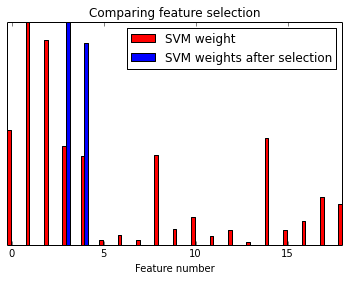

In [30]:
# Compare to the weights of an SVM
clf = skl.svm.SVC(kernel='linear')
clf.fit(data, target)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(data_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

clf_selected = skl.svm.SVC(kernel='linear')
clf_selected.fit(Uni_selector.transform(data), target)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(data_indices[Uni_selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

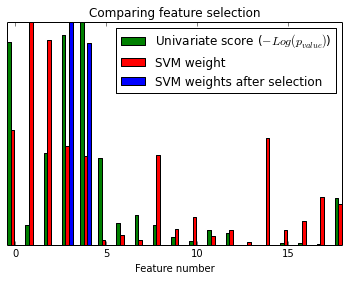

In [32]:
plt.bar(data_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

plt.bar(data_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

plt.bar(data_indices[Uni_selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [40]:
svm_weights_selected

array([ 1.      ,  0.904423])

###Output TO CSV

In [41]:
def Output_CSV(output_df,location):
    output_file = open(location, "ab")
    output_df.to_csv(output_file,index=False)
    output_file.close()
    
Feature_Selection_location = "e:\\nba\\Feature_Selection.csv"
Output_CSV(df1,Feature_Selection_location)